In [1]:
%load_ext autoreload
%autoreload 2

import torch

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import nn4n
from nn4n.models import CTRNN
from nn4n.structures import MultiAreaEI

## CTRNN under default settings

Linear Layer: 
   | in_size:    1
   | out_size:   100
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9890667200088501
   | weight_max: 0.9883159399032593
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



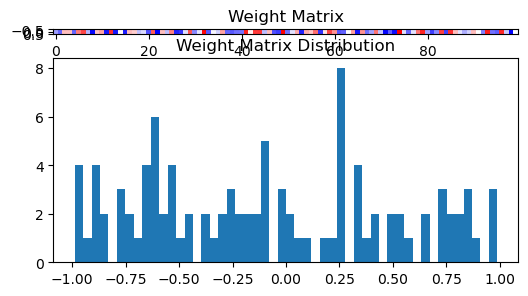

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           1.0

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1
   | in_size:          100
   | out_size:         100
   | distribution:     normal
   | bias:             False
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.35176533460617065
   | weight_max:       0.36053040623664856
   | weight_mean:      -0.0002671840484254062
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.99
   | spectral_radius:  0.9999999403953552



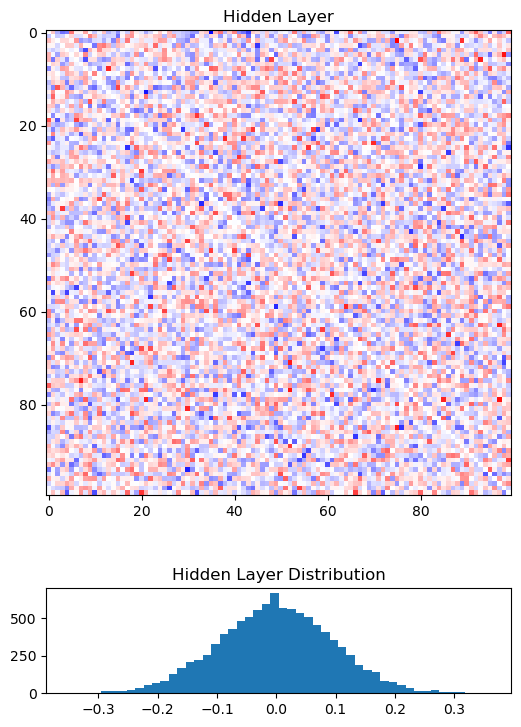

Linear Layer: 
   | in_size:    100
   | out_size:   1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09768235683441162
   | weight_max: 0.09979575872421265
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



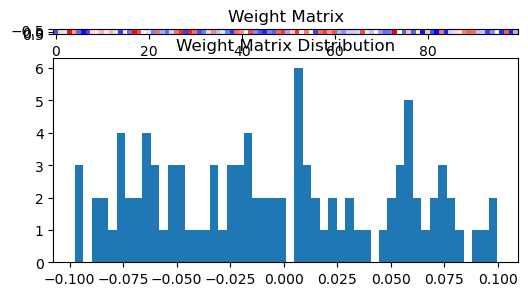

In [3]:
rnn = CTRNN()
rnn.print_layers()

## Positive value only in the hidden layer

Linear Layer: 
   | in_size:    1
   | out_size:   100
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([100, 1])
   | weight_min: -0.9889858365058899
   | weight_max: 0.9542031288146973
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



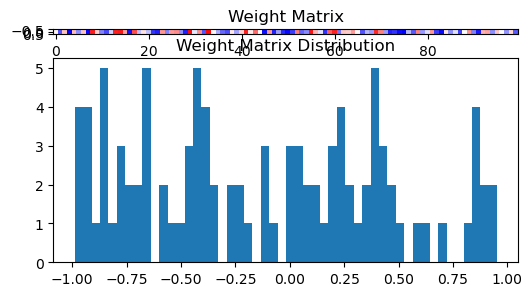

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           1.0

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1
   | in_size:          100
   | out_size:         100
   | distribution:     normal
   | bias:             False
   | dale:             False
   | shape:            torch.Size([100, 100])
   | weight_min:       -0.002804448362439871
   | weight_max:       0.023092910647392273
   | weight_mean:      0.010000335983932018
   | bias_min:         0.0
   | bias_max:         0.0
   | sparsity:         0.99
   | spectral_radius:  1.0



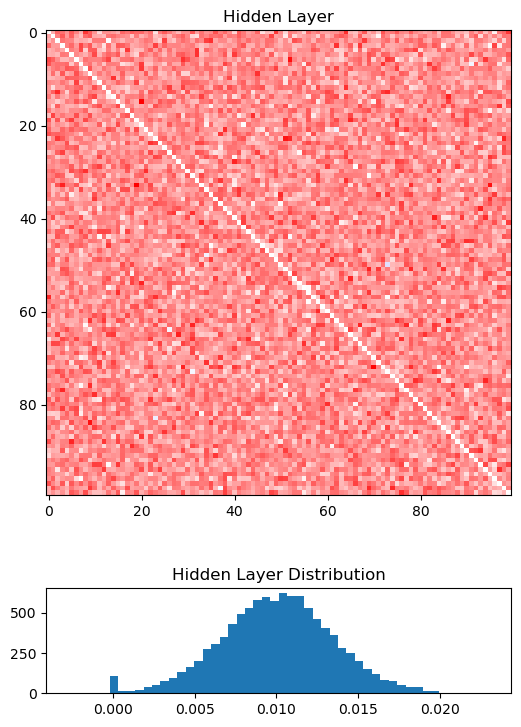

Linear Layer: 
   | in_size:    100
   | out_size:   1
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([1, 100])
   | weight_min: -0.09754308313131332
   | weight_max: 0.0994010716676712
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   None



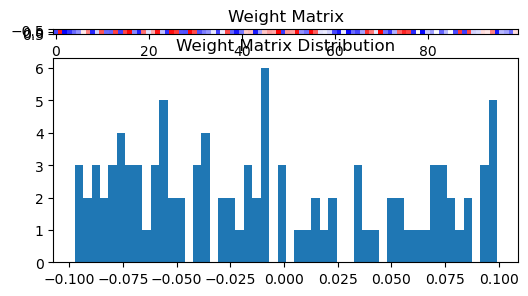

In [56]:
rnn = CTRNN(allow_negative=[True, False, True])
rnn.print_layers()

## Train on a simple sin wave prediction task

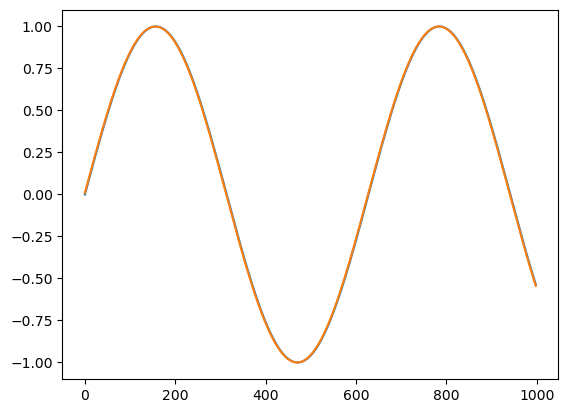

In [9]:
# predict sin wave
inputs = np.sin(np.linspace(0, 10, 1000))
inputs = torch.from_numpy(inputs).float().unsqueeze(1).unsqueeze(1)
labels = inputs[1:]
inputs = inputs[:-1]

plt.plot(inputs.squeeze(1).squeeze(1).numpy())
plt.plot(labels.squeeze(1).squeeze(1).numpy())
plt.show()

In [11]:
rnn = CTRNN(input_size=1, hidden_size=10, output_size=1)
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)

losses = []
for epoch in range(500):
    outputs, _ = rnn(inputs)
    loss = torch.nn.MSELoss()(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch} Loss {loss.item()}')


Epoch 0 Loss 0.6017867922782898
Epoch 50 Loss 0.13405907154083252
Epoch 100 Loss 0.010841278359293938
Epoch 150 Loss 0.0020337803289294243
Epoch 200 Loss 0.0020917344372719526
Epoch 250 Loss 0.0018968835938721895
Epoch 300 Loss 0.0020108481403440237
Epoch 350 Loss 0.0018387238960713148
Epoch 400 Loss 0.0019589418079704046
Epoch 450 Loss 0.0018743949476629496


## Use CTRNN with a mask

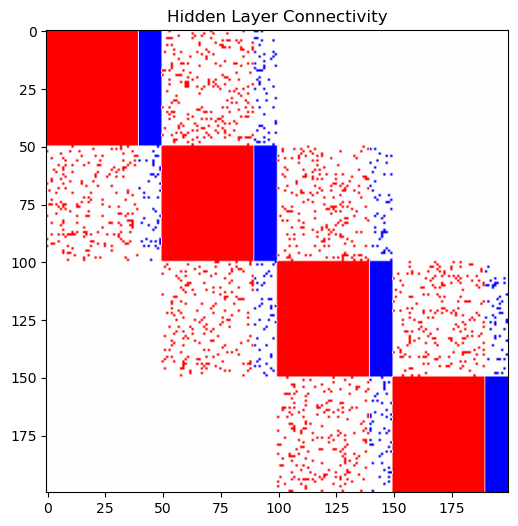

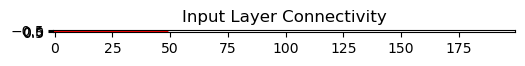

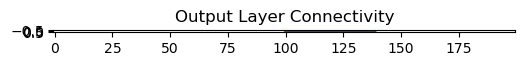

In [17]:
area_connectivities = np.array([
    [1.0, 0.1, 0.0, 0.0],
    [0.1, 1.0, 0.1, 0.0],
    [0.0, 0.1, 1.0, 0.1],
    [0.0, 0.0, 0.1, 1.0],
])

struct_params = {
    "n_areas": 4,
    "exc_pct": 0.8,
    "area_connectivities": area_connectivities,
    "input_areas": [0],
    "output_areas": [2],
    "input_size": 1,
    "hidden_size": 200,
    "output_size": 1,
    "inter_area_connections": [True, True, True, True],
    "inh_output": False,
}

network_struct = MultiAreaEI(**struct_params)
network_struct.visualize()

In [102]:
model_params = {
    # size
    "input_size": 1,
    "hidden_size": 200,
    "output_size": 1,
    
    # hyperparameters
    "tau": 50,
    "use_dale": True,
    "spec_rad": 1.5,
    "dt": 1,
    "activation": "relu",
    "recurrent_noise": 0.05,
    "new_synapse": False,
    "self_connections": False,
    "ei_balance": "synapse",

    # bias and distribution
    "input_bias": False,
    "hidden_bias": True,
    "output_bias": True,
    "input_dist": "uniform",
    "hidden_dist": "normal",
    "output_dist": "uniform",

    # masks
    "input_mask": network_struct.input_mask,
    "hidden_mask": network_struct.hidden_mask,
    "output_mask": network_struct.output_mask,
}

Linear Layer: 
   | in_size:    1
   | out_size:   200
   | dist:       uniform
   | bias:       False
   | shape:      torch.Size([200, 1])
   | weight_min: 0.0
   | weight_max: 0.9936854243278503
   | bias_min:   0.0
   | bias_max:   0.0
   | sparsity:   0.25



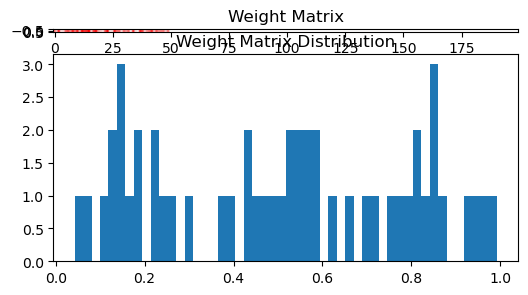

Recurrence: 
   | recurrent_noise: 0.05
   | activation:      relu
   | alpha:           0.02

Hidden Layer: 
   | self_connections: False
   | spec_rad:         1.5
   | in_size:          200
   | out_size:         200
   | distribution:     normal
   | bias:             True
   | dale:             True
   | shape:            torch.Size([200, 200])
   | weight_min:       -0.6627422571182251
   | weight_max:       0.18037189543247223
   | weight_mean:      0.0002060268889181316
   | bias_min:         -2.4217679500579834
   | bias_max:         2.544306993484497
   | sparsity:         0.2827
   | spectral_radius:  1.5



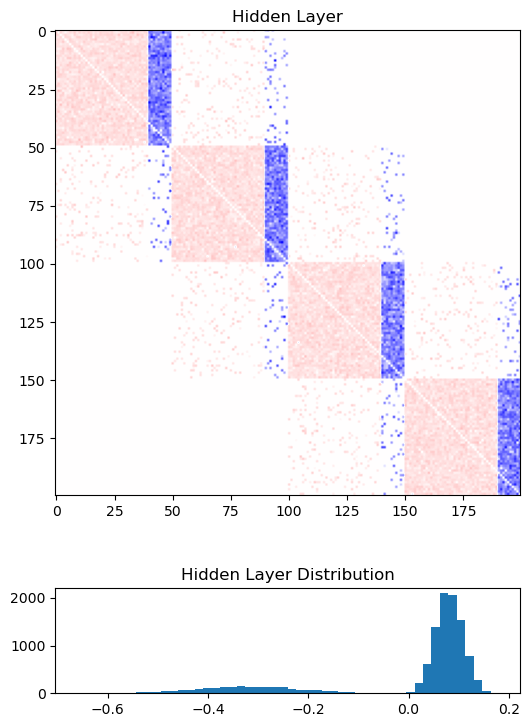

Linear Layer: 
   | in_size:    200
   | out_size:   1
   | dist:       uniform
   | bias:       True
   | shape:      torch.Size([1, 200])
   | weight_min: 0.0
   | weight_max: 0.3499952554702759
   | bias_min:   -0.10429627448320389
   | bias_max:   -0.10429627448320389
   | sparsity:   0.2



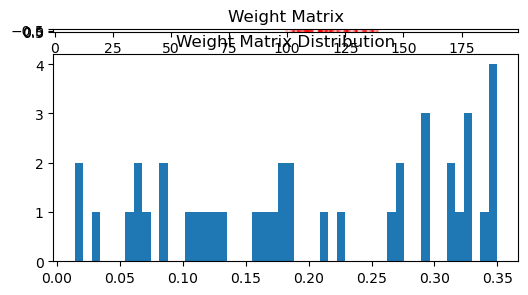

In [104]:
rnn = CTRNN(**model_params)
rnn.print_layers()